## GRIP : The Sparks foundation Data Science and Business Analytics internship
## Creator : Munj Bhavesh Patel
## Task 4: To create a Decision Tree classifier and visualize it graphically

In [23]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import skew, norm, kurtosis

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
# Setting Parametrs

plt.rcParams['figure.figsize'] = 10,10
warnings.filterwarnings('ignore')

## Importing data

In [25]:
df = pd.read_csv(r"C:\Users\Munj Patel\Desktop\INTERNSHIP\SPARKS_FOUNDATION\Project-2\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df = df.drop('Id',axis=1)

## Getting basic info

In [27]:
df.shape

(150, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking for null and duplicate values

In [29]:
df.isnull().sum() # No null vales found

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
df[df.duplicated() == 'True'] # No duplicate values found

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [31]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Pairplot of Variables:

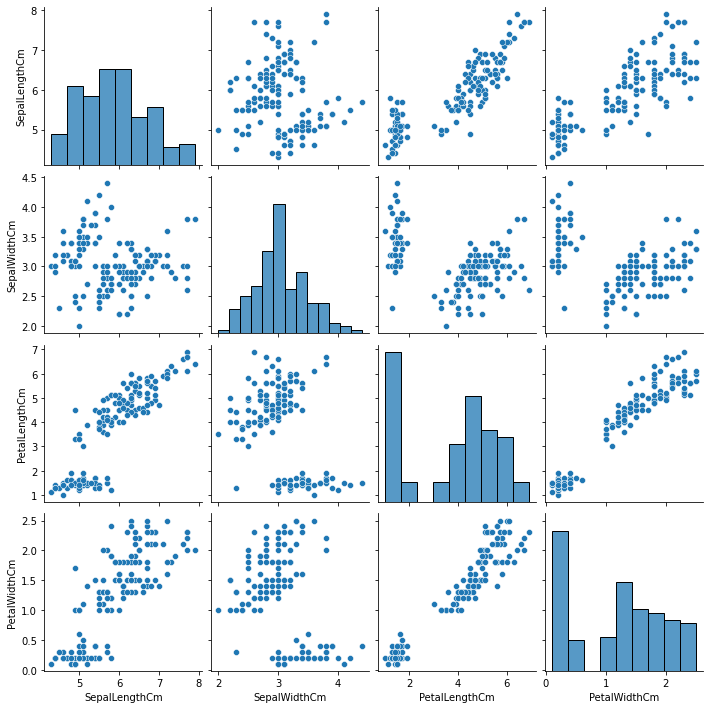

In [32]:
sns.pairplot(df)

### Checking the distribution

Skewness of SepalLengthCm is 0.3117530585022963.
Kurtosis of SepalLengthCm is -0.5735679489249765.


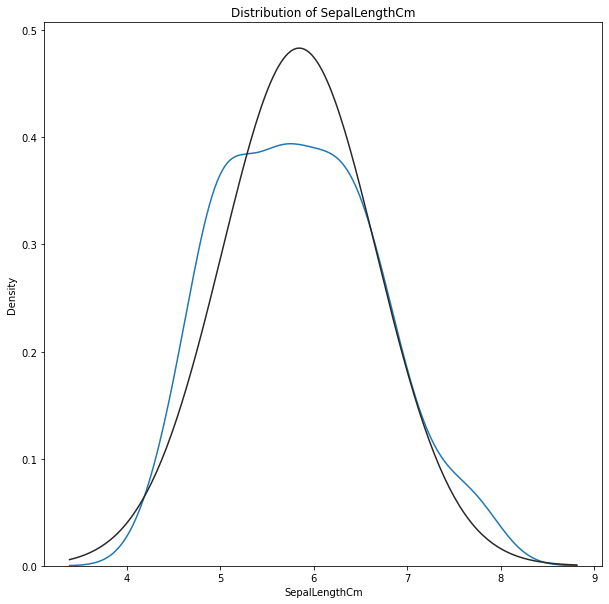

Skewness of SepalWidthCm is 0.330702812773315.
Kurtosis of SepalWidthCm is 0.24144329938318343.


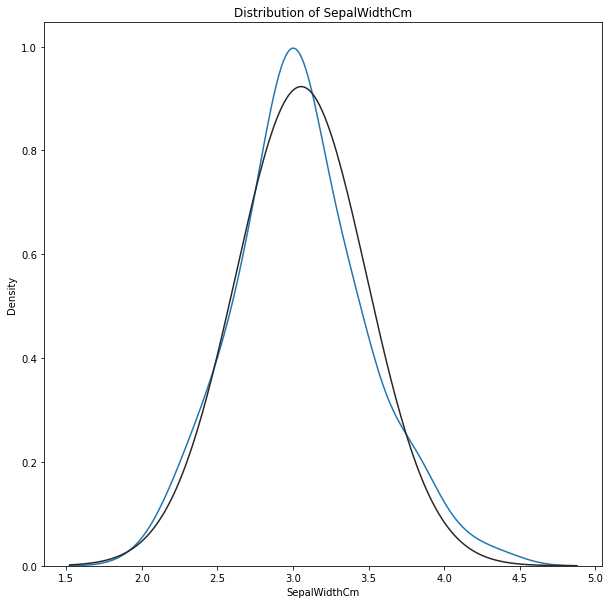

Skewness of PetalLengthCm is -0.2717119501716388.
Kurtosis of PetalLengthCm is -1.3953593021397128.


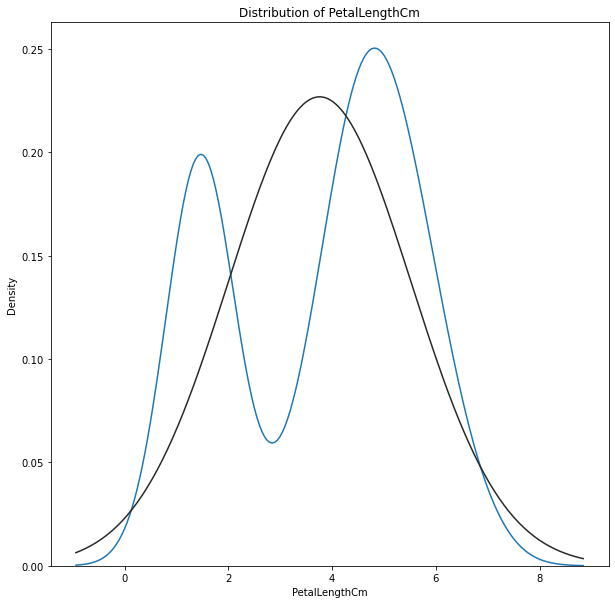

Skewness of PetalWidthCm is -0.10394366626751729.
Kurtosis of PetalWidthCm is -1.3352456441311857.


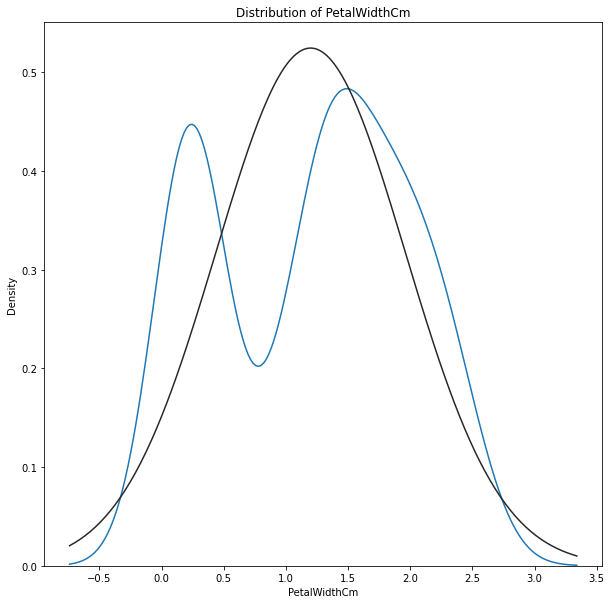

In [33]:
for i in df.columns[:-1]:
    
    sns.distplot(df[i], hist = False, fit = norm)
    
    print(f'Skewness of {i} is {skew(df[i])}.')
    print(f'Kurtosis of {i} is {kurtosis(df[i])}.')
    
    plt.title(f'Distribution of {i}')
    plt.show()

### Frequency of each Species

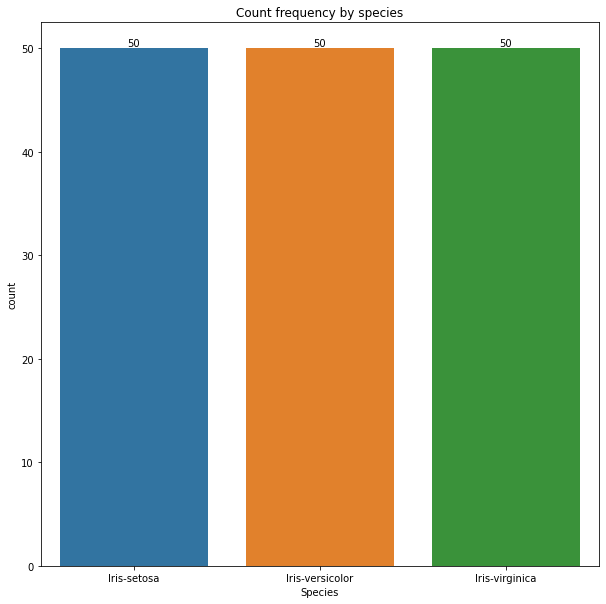

In [34]:
ax = sns.countplot(df['Species'])

for j in ax.containers:
    ax.bar_label(j)
    plt.title('Count frequency by species')

## Encoding the Species variable:

In [35]:
for i in sorted(df['Species'].unique()):
    print(f'{i} will be replaced by {sorted(df.Species.unique()).index(i)}.')

Iris-setosa will be replaced by 0.
Iris-versicolor will be replaced by 1.
Iris-virginica will be replaced by 2.


In [36]:
df['Species'] = df['Species'].astype('category').cat.codes
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8

## Defining the model:

In [38]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [40]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
y_predict = model_dt.predict(x_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0], dtype=int8)

## Model Evaluation:

In [42]:
print(f'(1) Accuracy of model: {accuracy_score(y_test, y_predict)}\n')
print(f'(2) Classification Report:\n\n {classification_report(y_test, y_predict)}')
print(f'(3) Confusion Matrix:\n\n {confusion_matrix(y_test, y_predict)}')

(1) Accuracy of model: 1.0

(2) Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

(3) Confusion Matrix:

 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


#### The model performs quite well with all the classes classified correctly!

### Performing Cross Validation

In [43]:
mean_acc = cross_val_score(model_dt, x,y).mean()
std = cross_val_score(model_dt, x,y).std()

cd_model = std/mean_acc

print(f'The model provides mean accuracy of {np.round(mean_acc*100,2)}% with a coefficient of variation of {cd_model}.')

The model provides mean accuracy of 96.0% with a coefficient of variation of 0.03803628871563652.


## Decision Tree Visualization

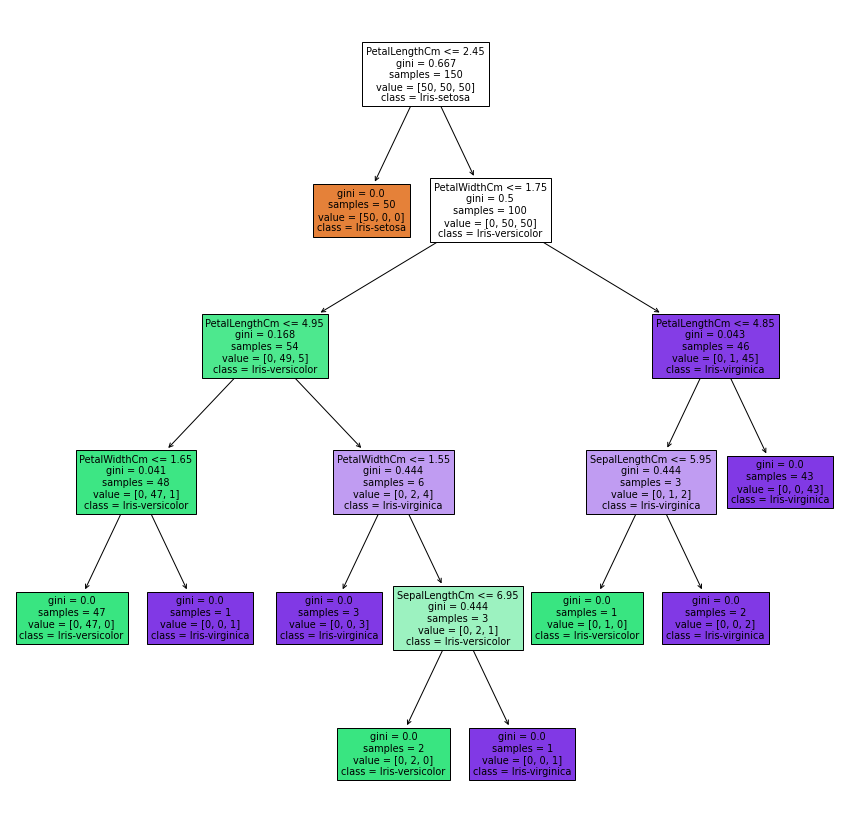

In [44]:
plt.figure(figsize = (15,15))
model_dt.fit(x,y) #Training

plot_tree(model_dt,
          class_names=['Iris-setosa','Iris-versicolor', 'Iris-virginica'],
          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          filled=True)
plt.show()